In [6]:
import pandas as pd
import os

os.chdir('C:/Users/TAN/Documents/IM/RealEstateProject/Project Repo/RealEstateProject')
#xl_file = pd.ExcelFile()
dfs = pd.read_excel('preprocessed_data2.xlsx', sheet_name='Sheet1',index_col=0)

In [7]:
print(dfs.info())
len(dfs['geoloc'].unique().tolist())



composite_id=['link']
technical=['date', 'name']
possible_features=dfs.columns[~dfs.columns.isin(technical)&~dfs.columns.isin(composite_id)].tolist()


unique_records=dfs[[composite_id[0]]+possible_features].drop_duplicates()
unique_records_idx=unique_records.index
total_records=len(dfs)
duplicated_records_ratio=1 - len(unique_records)/total_records
print('Total number of records: {0:,}'.format(total_records))
print('Duplicated records are {0:.3%}'.format(duplicated_records_ratio))

possible_features

u_raw=dfs.loc[unique_records_idx, possible_features + composite_id]

print("Mean of the features")
print( u_raw.mean())
print("Standard Deviation of the features")
print(u_raw.std())



mask = (u_raw.price>10000)
sale=u_raw[mask]
rent=u_raw[~mask]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26309 entries, 0 to 26308
Data columns (total 13 columns):
date          26309 non-null object
name          25837 non-null object
rooms         17757 non-null float64
totalarea     17586 non-null float64
landarea      7799 non-null float64
price         25821 non-null float64
pricesqm      25567 non-null float64
numoffloor    19514 non-null object
geoloc        25452 non-null object
builtyear     13072 non-null float64
energymark    5525 non-null object
condition     12633 non-null object
link          26309 non-null object
dtypes: float64(6), object(7)
memory usage: 2.8+ MB
None
Total number of records: 26,309
Duplicated records are 0.000%
Mean of the features
rooms        3.135777e+00
totalarea    4.321837e+07
landarea     1.724522e+04
price        1.210932e+05
pricesqm     8.561442e+02
builtyear    1.989096e+03
dtype: float64
Standard Deviation of the features
rooms        2.619628e+00
totalarea    4.054489e+09
landarea     9.210906

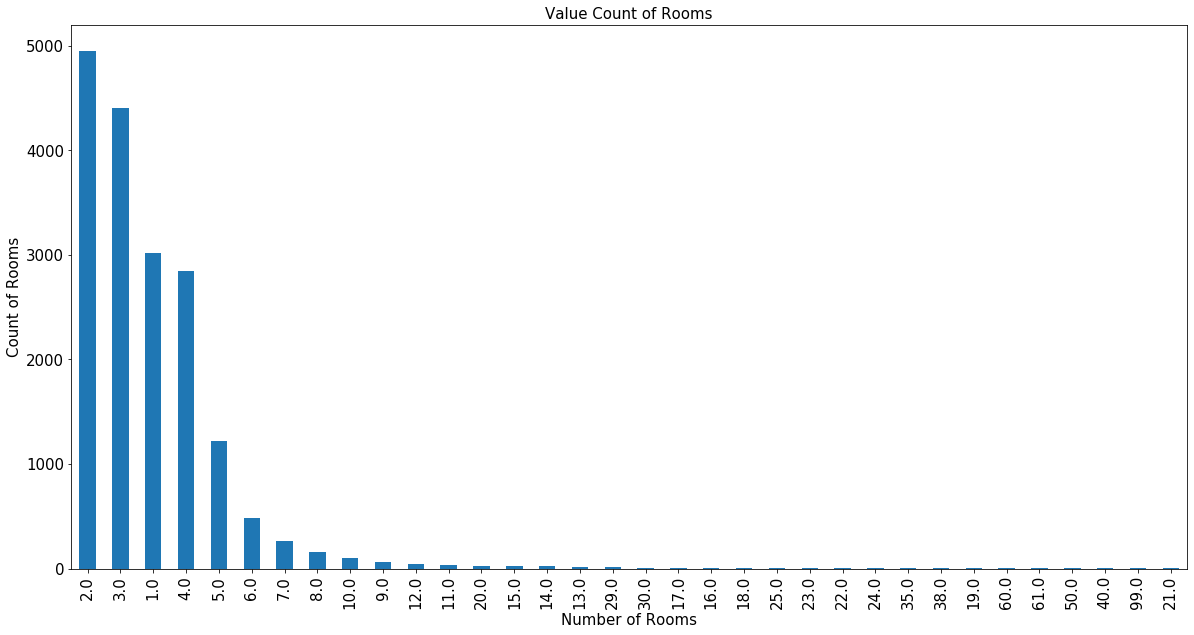

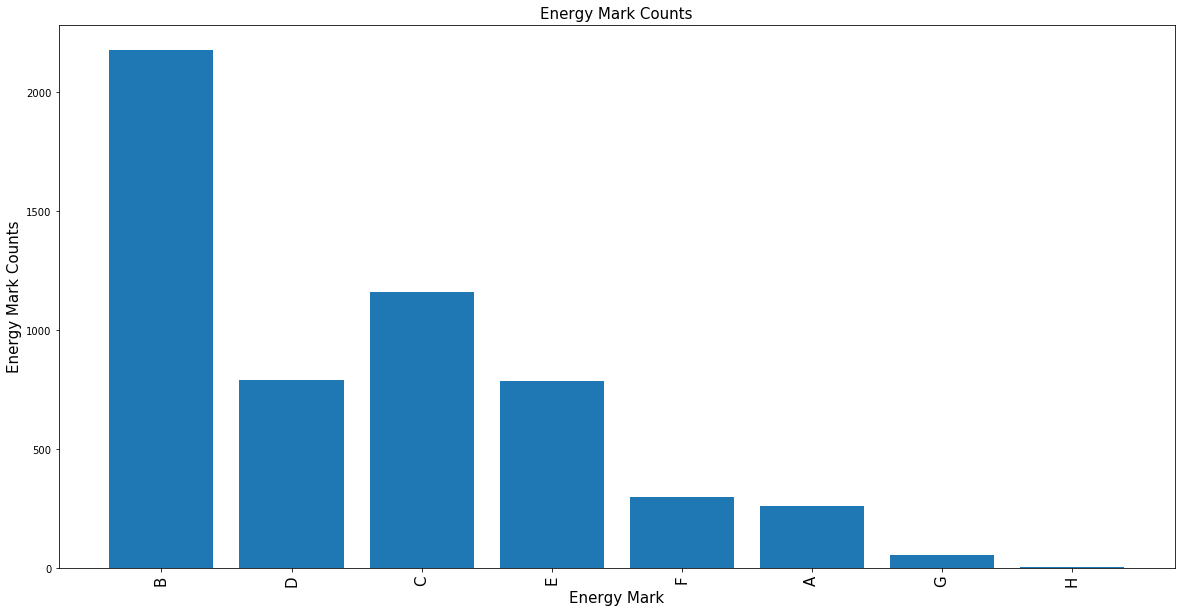

In [8]:
import missingno as msn
import matplotlib.pyplot as plt
import numpy as np

#msn.bar(u_raw)
#msn.heatmap(u_raw) 
# Columns may contain non-numeric values, errors or missing values. Therefore, non-numeric values must be dealt with.
#pd.to_numeric(u_raw['rooms'], errors='coerce').hist(bins=10) # ‘coerce’ -> invalid parsing will be set as NaN

        
ax=u_raw['rooms'].value_counts().plot(kind='bar', figsize=(20,10), fontsize=15)
plt.title("Value Count of Rooms", fontsize=15)
ax.set_xlabel("Number of Rooms", fontsize=15)
ax.set_ylabel("Count of Rooms", fontsize=15)
plt.show()


plt.figure(figsize=(20,10))
unique_values = pd.DataFrame(u_raw.energymark.value_counts(sort=False))
energy_lvl = [ 'B', 'D', 'C', 'E', 'F', 'A', 'G', 'H']
unique_values = unique_values.reindex(energy_lvl)
plt.xticks(rotation=90, fontsize=15)
plt.bar(unique_values.index, unique_values.energymark)
plt.xlabel('Energy Mark', fontsize=15)
plt.ylabel('Energy Mark Counts', fontsize=15)
plt.title('Energy Mark Counts', fontsize=15)
plt.show()


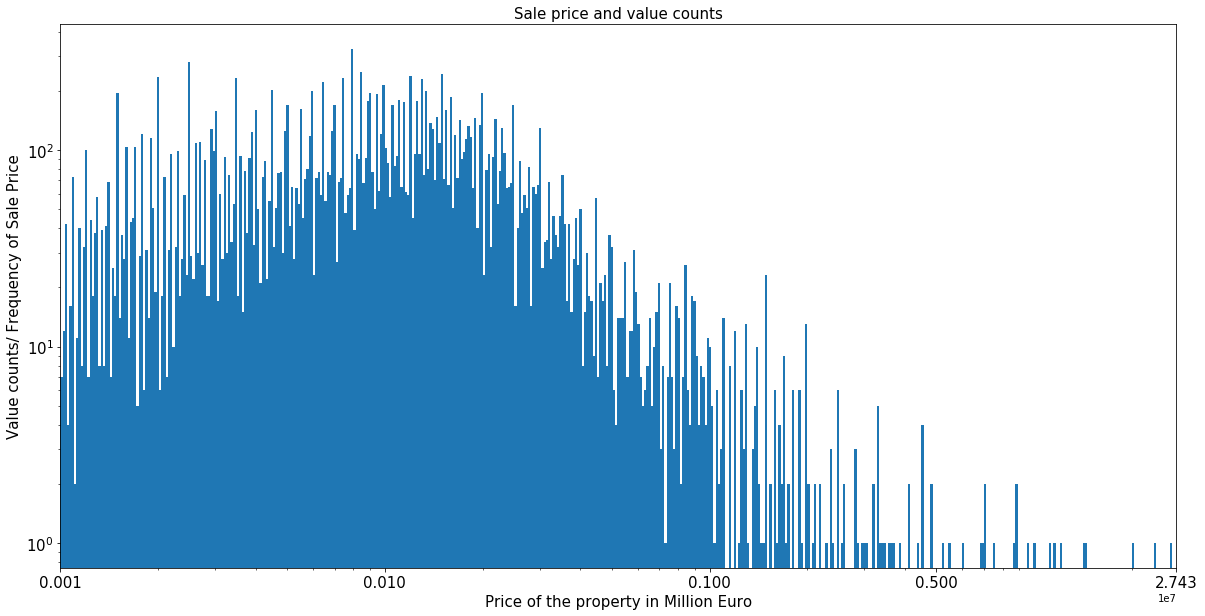

c:\users\tan\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\tan\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


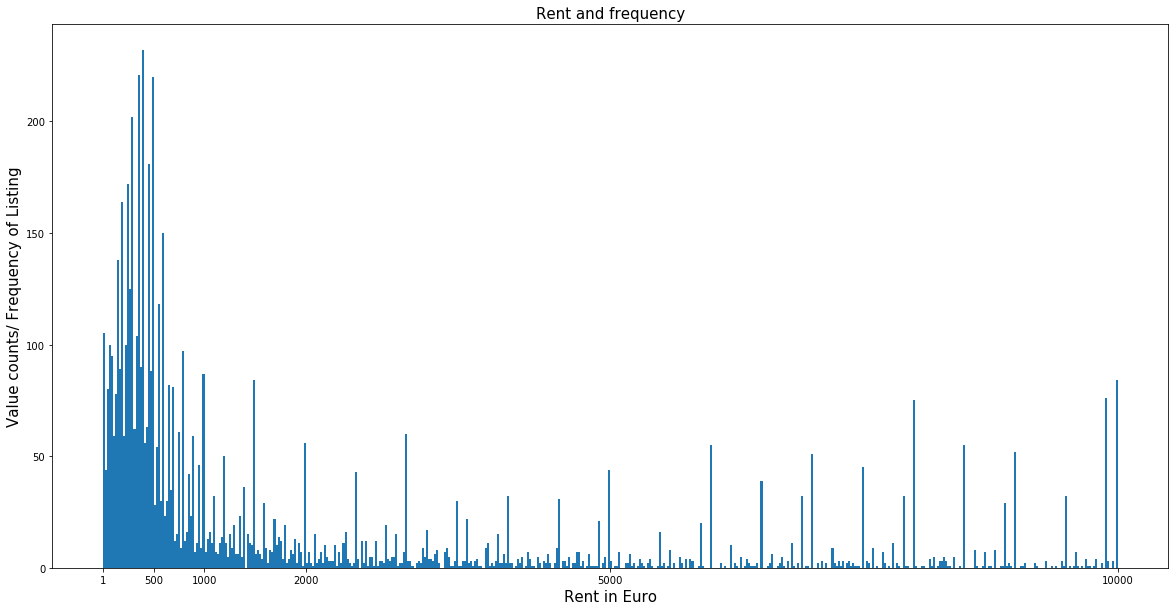

55500.0


In [9]:
import seaborn as sns
import matplotlib.ticker
plt.figure(figsize=(20,10))
ax=sale['price'].plot(bins=np.logspace(np.log10(sale.price.min()), np.log10(sale.price.max()), 500), kind='hist', loglog=True, xlim=(sale.price.min(),sale.price.max()),fontsize=15)
ax.set_xticks([sale.price.min(), 100000, 1000000, 5000000, sale.price.max()])
plt.ylabel("Value counts/ Frequency of Sale Price", fontsize=15)
plt.xlabel("Price of the property in Million Euro", fontsize=15)
plt.title('Sale price and value counts', fontsize=15)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.show()

print()

plt.figure(figsize=(20,10))
plt.xlabel("Rent in Euro", fontsize=15)
plt.ylabel("Value counts/ Frequency of Listing", fontsize=15)
plt.title('Rent and frequency', fontsize=15)
plt.hist(rent.price, bins=500)
plt.xticks([rent.price.min(), 500, 1000, 2000, 5000, rent.price.max()])
plt.show()


print(u_raw.price.median())

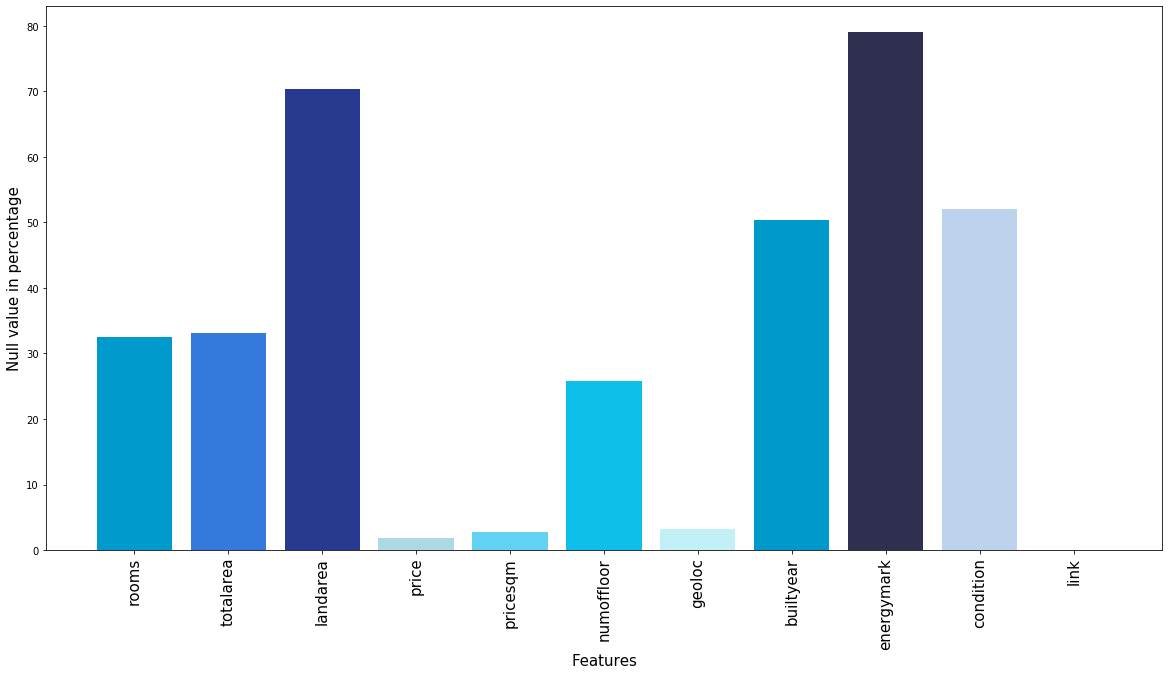

rooms         32.505987
totalarea     33.155954
landarea      70.356152
price          1.854879
pricesqm       2.820328
numoffloor    25.827664
geoloc         3.257440
builtyear     50.313581
energymark    78.999582
condition     51.982211
link           0.000000
dtype: float64


In [10]:

plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=15)
null_val=u_raw.isnull().sum()/u_raw.shape[0]*100
plt.bar(null_val.index, null_val, color=['#009ACD','#3579DC', '#283A90','#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC', '#2F2F4F', '#BCD2ED'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Null value in percentage', fontsize=15)
plt.show()

print( null_val)

**********Display 10 largest value of Total Area**********
2290     3.920100e+11
17283    3.680200e+11
9698     5.810000e+05
22360    3.768000e+05
23983    3.432000e+05
17084    2.887550e+05
7208     2.400000e+05
14064    1.895350e+05
8023     1.730000e+05
17203    1.600000e+05
Name: totalarea, dtype: float64
**********Scatter plot before data cleaning**********


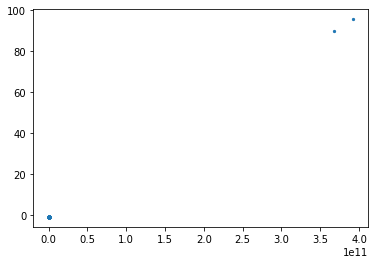

**********Scatter plot after data cleaning**********


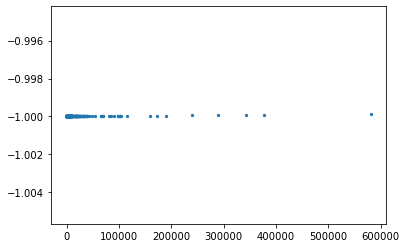

**********Standard deviation highest 30 values**********
9698     75.973507
22360    48.920168
23983    44.468688
17084    37.255568
7208     30.796285
14064    24.110454
8023     21.919822
17203    20.197523
23940    14.381453
3180     12.738645
8338     12.592912
4817     12.500173
2265     12.433931
1010     12.115968
1428     12.115968
19581    10.989849
25157    10.168445
19444     9.828490
13555     8.141432
10240     8.084199
25091     8.008947
21875     7.677736
11018     7.611494
18281     6.196294
20264     5.372505
22560     4.763077
4166      4.246387
4001      4.166896
20120     4.069255
21274     3.994666
13932     3.875430
19005     3.703201
1282      3.616158
11632     3.616158
887       3.504474
13674     3.504474
15323     3.411470
23685     3.120269
16707     3.104900
22935     3.104900
13498     3.104635
16911     3.067010
5615      2.977583
232       2.855300
17173     2.842051
5467      2.736064
7336      2.728644
8903      2.444598
23006     2.444598
4606      2.

In [20]:
#print(u_raw.nlargest(10,'totalarea'))
#mask=u_raw.index(u_raw.totalarea.max())
#mask=mask.totalarea>1
#print(mask)
#res = u_raw[~mask]
print("**********Display 10 largest value of Total Area**********")
print(u_raw.totalarea.nlargest(10))


'''
#print(xy.values)
res=u_raw[~u_raw.totalarea.isin(xy.values)]
res.head(10)   
std=res.totalarea.std()
y=(res.totalarea/std)-1
'''
print("**********Scatter plot before data cleaning**********")
std=u_raw.totalarea.std()
std_TA=(u_raw.totalarea/std)-1
#plt.figure(figsize=(20,10))
plt.scatter(x=u_raw.totalarea,y=std_TA, s=5)
plt.savefig('C:/Users/TAN/Documents/IM/RealEstateProject/Project Repo/RealEstateProject/Plots/std_ta.png')
plt.show()




print("**********Scatter plot after data cleaning**********")
xy=u_raw.totalarea.nlargest(2)
res=u_raw[~u_raw.totalarea.isin(xy.values)]
std_res=res.totalarea.std()
std_res_norm=(res.totalarea/std)-1


plt.scatter(x=res.totalarea,y=std_res_norm, s=5)
plt.show()

print("**********Standard deviation highest 30 values**********")
print(y.nlargest(60))
print()
print("**********Standard deviation lowest 60 values**********")
print(y.nsmallest(60))



In [498]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

profile = ProfileReport(res, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [500]:
profile.to_widgets()